## Creating a Baseline using RF

This script will walk you through the creating of a baseline model for the data.

In [1]:
import numpy as np
import importlib
import fncs_helper as fncs
import matplotlib.pyplot as plt
import random

importlib.reload(fncs)

import json
with open('Settings.json') as f:
    d = json.load(f)
    dataFolder = d['dataFolder']

### Loading the Data and Features

First, we define a helper function to load the data and compute the features. Take a look at how the labels are extracted by following a similar procedure for window extraction and assigning the mode.

Extracting the features for the training data and splitting it into training / validation.

In [2]:
# Specifying the data directory
dirTrain = dataFolder + 'Train/'

# Specifying some parameters for the feature extraction
timeStep = 1
winSz = 2

# Specifying IDs for training and validation sets
valIDs = [2,11,25]
trainIDs = list(set(np.array(range(25))+1).difference(valIDs))

# Recovering the features and labels
xTrain, yTrain = fncs.loadFeatures(dirTrain,winSz,timeStep,trainIDs)
xVal, yVal = fncs.loadFeatures(dirTrain,winSz,timeStep,valIDs)

### Training an RF Classifier

An RF will be one of the models that we will consider as a baseline. Let us begin by defining and training the model.

In [3]:
from sklearn.ensemble import RandomForestClassifier

# Defining the model using default parameters
M_RF = RandomForestClassifier()

# Training the model
M_RF.fit(xTrain,yTrain)

RandomForestClassifier()

Performance of predictions using the training and validation set.

Results for Validation:

Training:  Acc = 1.000
Training:  BalAcc = 1.000
Validation: Acc = 0.859
Validation: BalAcc = 0.729


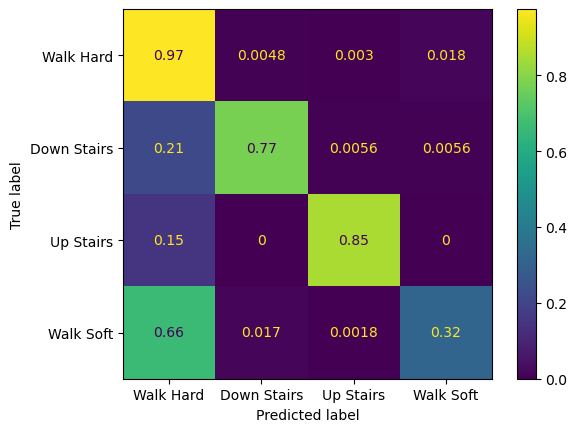

In [4]:
yTrainHat = M_RF.predict(xTrain)
yValHat = M_RF.predict(xVal)

print('Results for Validation:\n')
fncs.summaryPerf(yTrain,yTrainHat,yVal,yValHat)